In [32]:
import pandas as pd
from sklearn.calibration import CalibrationDisplay
from statistics import median
import numpy as np
import matplotlib.pyplot as plt

In [88]:
mcd_df = pd.read_pickle("/home/luke/ames_graphormer/data/results/mc_dropout_preds.pkl")
mcd_df = mcd_df.transpose()
mcd_df.label = mcd_df.label.astype(int)

# Calculating confidence intervals
confidence_level = 0.95
mcd_df['median_preds'] = mcd_df['preds'].apply(lambda x: np.median(x))
mcd_df['lower_ci'] = mcd_df['preds'].apply(lambda x: np.percentile(x, (1 - confidence_level) / 2 * 100))
mcd_df['upper_ci'] = mcd_df['preds'].apply(lambda x: np.percentile(x, (1 + confidence_level) / 2 * 100))

1783

(<matplotlib.lines.Line2D at 0x7f36f32d1e80>,
 <matplotlib.lines.Line2D at 0x7f36f32d31d0>)

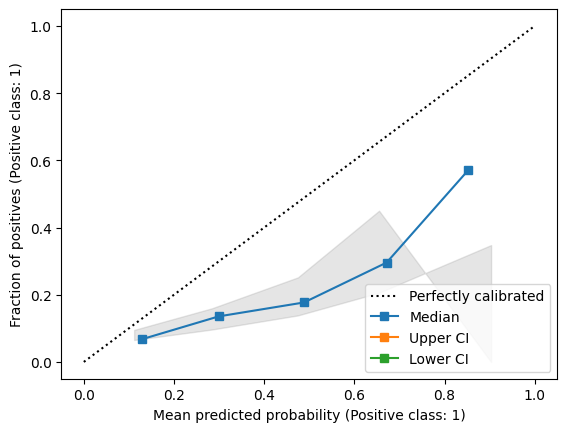

In [83]:
# Generate the basic calibration curve
fig, ax = plt.subplots()
CalibrationDisplay.from_predictions(mcd_df["label"], mcd_df["median_preds"], ax=ax, strategy="uniform", name="Median")
CalibrationDisplay.from_predictions(mcd_df["label"], mcd_df["upper_ci"], ax=ax, strategy="uniform", name="Upper CI")
CalibrationDisplay.from_predictions(mcd_df["label"], mcd_df["lower_ci"], ax=ax, strategy="uniform", name="Lower CI")

# Add confidence interval "clouds"

lines = ax.get_lines()
upper_ci_line, lower_ci_line = lines[2], lines[3]
upper_ci_y, lower_ci_y, ci_x = upper_ci_line.get_ydata(), lower_ci_line.get_ydata(), lower_ci_line.get_xdata()

for line in ax.get_lines():
    if line.get_label() == 'Upper CI' or line.get_label() == 'Lower CI':
        line.remove()

ax.fill_between(ci_x, upper_ci_y, lower_ci_y, color='gray', alpha=0.2)
upper_ci_line, lower_ci_line
